**OBJECTIVE**: To determine whether the person is having cancer or not by classifying as malignant or beginin.

Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop('Unnamed: 32',axis=1,inplace=True)

**Understanding the data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.shape

(569, 32)

In [6]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**As lm plot combines reggplot and facet grid(FacetGrid class helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset) so we are using lm plot**

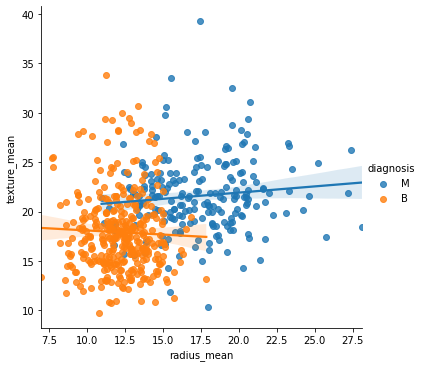

In [8]:
sns.lmplot(x ='radius_mean', y='texture_mean',hue='diagnosis', data = df)

From the above lmplot we see that where the radius_mean is higher the class label is mostly **"M"**
while for lesser radius_mean values the class label is **"B"**


We have a dataset of 569 rows and 32 columns.

As there are no null values the dataset is clean to proceed for further analysis.

In [9]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [10]:
k=df.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]> abs(0.7)) and (i!=j)]
z

[['radius_mean', 'perimeter_mean'],
 ['radius_mean', 'area_mean'],
 ['radius_mean', 'concave points_mean'],
 ['radius_mean', 'area_se'],
 ['radius_mean', 'radius_worst'],
 ['radius_mean', 'perimeter_worst'],
 ['radius_mean', 'area_worst'],
 ['radius_mean', 'concave points_worst'],
 ['texture_mean', 'texture_worst'],
 ['perimeter_mean', 'radius_mean'],
 ['perimeter_mean', 'area_mean'],
 ['perimeter_mean', 'concavity_mean'],
 ['perimeter_mean', 'concave points_mean'],
 ['perimeter_mean', 'area_se'],
 ['perimeter_mean', 'radius_worst'],
 ['perimeter_mean', 'perimeter_worst'],
 ['perimeter_mean', 'area_worst'],
 ['perimeter_mean', 'concave points_worst'],
 ['area_mean', 'radius_mean'],
 ['area_mean', 'perimeter_mean'],
 ['area_mean', 'concave points_mean'],
 ['area_mean', 'radius_se'],
 ['area_mean', 'perimeter_se'],
 ['area_mean', 'area_se'],
 ['area_mean', 'radius_worst'],
 ['area_mean', 'perimeter_worst'],
 ['area_mean', 'area_worst'],
 ['area_mean', 'concave points_worst'],
 ['smoothne

radius, perimeter, area,compactness, concavity, concavepoints

In [11]:
df.head(8)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510


**Feature Scaling**

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
x=df[['radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concave points_worst','compactness_worst']]

In [15]:
scaler.fit(x)
X_scaled=scaler.transform(x)

In [16]:
y=df[['diagnosis']]

**Splitting the data for training and testing**

In [18]:
scaler.fit(X_scaled)

StandardScaler()

In [20]:
dataset_scaled = pd.DataFrame(X_scaled,columns=['radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concave points_worst','compactness_worst'])
dataset_scaled

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_worst,compactness_worst
0,1.097064,1.269934,0.984375,3.283515,2.652874,2.296076,2.616665
1,1.829821,1.685955,1.908708,-0.487072,-0.023846,1.087084,-0.430444
2,1.579888,1.566503,1.558884,1.052926,1.363478,1.955000,1.082932
3,-0.768909,-0.592687,-0.764464,3.402909,1.915897,2.175786,3.893397
4,1.750297,1.776573,1.826229,0.539340,1.371011,0.729259,-0.313395
...,...,...,...,...,...,...,...
564,2.110995,2.060786,2.343856,0.219060,1.947285,1.629151,-0.273318
565,1.704854,1.615931,1.723842,-0.017833,0.693043,0.733827,-0.394820
566,0.702284,0.672676,0.577953,-0.038680,0.046588,0.414069,0.350735
567,1.838341,1.982524,1.735218,3.272144,3.296944,2.289985,3.904848


**Using the model of KNN**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=52)

In [64]:
accuracy_score1 = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train.values.ravel())
    y_predict = knn.predict(X_test)
    accuracy = accuracy_score(y_test,y_predict)
    accuracy_score1.append(accuracy)
    print("Accuracy Score=",i, "is",accuracy)

Accuracy Score= 1 is 0.9122807017543859
Accuracy Score= 2 is 0.9064327485380117
Accuracy Score= 3 is 0.9415204678362573
Accuracy Score= 4 is 0.9298245614035088
Accuracy Score= 5 is 0.935672514619883
Accuracy Score= 6 is 0.9415204678362573
Accuracy Score= 7 is 0.9473684210526315
Accuracy Score= 8 is 0.9415204678362573
Accuracy Score= 9 is 0.9473684210526315
Accuracy Score= 10 is 0.9473684210526315
Accuracy Score= 11 is 0.9532163742690059
Accuracy Score= 12 is 0.9532163742690059
Accuracy Score= 13 is 0.9532163742690059
Accuracy Score= 14 is 0.9532163742690059
Accuracy Score= 15 is 0.9590643274853801
Accuracy Score= 16 is 0.9532163742690059
Accuracy Score= 17 is 0.9590643274853801
Accuracy Score= 18 is 0.9590643274853801
Accuracy Score= 19 is 0.9532163742690059
Accuracy Score= 20 is 0.935672514619883
Accuracy Score= 21 is 0.9415204678362573
Accuracy Score= 22 is 0.9473684210526315
Accuracy Score= 23 is 0.9415204678362573
Accuracy Score= 24 is 0.9415204678362573
Accuracy Score= 25 is 0.941

In [65]:
data = pd.DataFrame(accuracy_score1,columns=["accuracy"])
data

,accuracy
0,0.912281
1,0.906433
2,0.941520
3,0.929825
4,0.935673
5,0.941520
6,0.947368
7,0.941520
8,0.947368
9,0.947368


In [66]:
data["k_value"]= range(1,40)
data

,accuracy,k_value
0,0.912281,1
1,0.906433,2
2,0.941520,3
3,0.929825,4
4,0.935673,5
5,0.941520,6
6,0.947368,7
7,0.941520,8
8,0.947368,9
9,0.947368,10


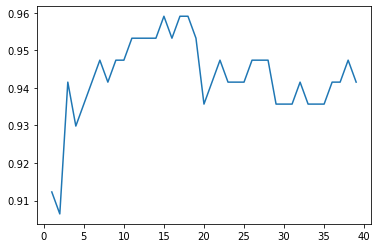

In [67]:
plt.plot(data["k_value"],data["accuracy"])

In [68]:
error_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train.values.ravel())
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test.values.ravel()))

In [69]:
error_rate

[0.08771929824561403,
 0.0935672514619883,
 0.05847953216374269,
 0.07017543859649122,
 0.06432748538011696,
 0.05847953216374269,
 0.05263157894736842,
 0.05847953216374269,
 0.05263157894736842,
 0.05263157894736842,
 0.04678362573099415,
 0.04678362573099415,
 0.04678362573099415,
 0.04678362573099415,
 0.04093567251461988,
 0.04678362573099415,
 0.04093567251461988,
 0.04093567251461988,
 0.04678362573099415,
 0.06432748538011696,
 0.05847953216374269,
 0.05263157894736842,
 0.05847953216374269,
 0.05847953216374269,
 0.05847953216374269,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.06432748538011696,
 0.06432748538011696,
 0.06432748538011696,
 0.05847953216374269,
 0.06432748538011696,
 0.06432748538011696,
 0.06432748538011696,
 0.05847953216374269,
 0.05847953216374269,
 0.05263157894736842,
 0.05847953216374269]

Text(0, 0.5, 'Mean Error')

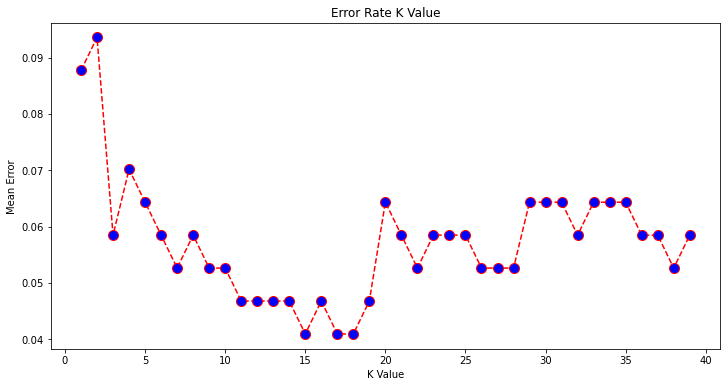

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [71]:
knn.score(X_test, y_test)

0.9415204678362573

In [72]:
predictions=knn.predict(X_test)
predictions

array(['B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'B'], dtype=object)

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

In [74]:
matrix=confusion_matrix(y_test,predictions)
print(matrix) 

[[104   3]
 [  7  57]]


In [75]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           B       0.97      0.94      0.95       111
           M       0.89      0.95      0.92        60

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



**Model Using Decision Tree.**

In [ ]:
y_train.value_counts(normalize=True)

In [ ]:
y_test.value_counts(normalize=True)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_test.shape, y_test.shape

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = dt()
tree.fit(X_train, y_train)

In [ ]:
dt_model = dt(random_state=10)

In [ ]:
dt_model.fit(X_train, y_train)

In [ ]:
from sklearn import tree
text_representation = tree.export_text(dt_model)
print(text_representation)

In [ ]:
dt_model.score(X_train, y_train)

In [ ]:
pred_new=dt_model.predict(X_test)

In [ ]:
y_pred = dt_model.predict_proba(X_test)[:,1]

In [ ]:
y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.7:
        y_new.append(0)
    else:
        y_new.append(1)

In [ ]:
y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.7:
        y_new.append('Malignant')
    else:
        y_new.append('Benign')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_new,y_test)

In [ ]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(dt_model, 
                   feature_names=list(x.columns),  
                   class_names=['Malignant','Benign'],
                   filled=True)

In [ ]:
train_accuracy = []
test_accuracy = []
for depth in range(1,9):
    dt_model = dt(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    test_accuracy.append(dt_model.score(X_test, y_test))

In [ ]:
frame = pd.DataFrame({'max_depth':range(1,9), 'train_acc':train_accuracy, 'test_acc':test_accuracy})
frame

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.show()

In [ ]:
dt_model = dt(max_depth=4, max_leaf_nodes=20, random_state=10)

In [ ]:
dt_model.fit(X_train, y_train)

In [ ]:
dt_model.score(X_train, y_train)

In [ ]:
dt_model.score(X_test, y_test)

In [ ]:
fig = plt.figure(figsize=(35,15))
_ = tree.plot_tree(dt_model, 
                   feature_names=list(x.columns),  
                   class_names=['Malignant','Benign'],
                   filled=True)